In [2]:
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import matplotlib as mpl
import matplotlib.font_manager as fm

In [97]:
dataset_90 = pd.read_csv('Card_data_sample.csv', encoding='cp949')
dataset_90.shape
dataset_90.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478622 entries, 0 to 478621
Data columns (total 19 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   년월       478622 non-null  object 
 1   시도명      478622 non-null  object 
 2   지역구분     478622 non-null  object 
 3   읍면동명     478622 non-null  object 
 4   거주인구     478622 non-null  int64  
 5   유동인구     478622 non-null  int64  
 6   근로인구     478622 non-null  int64  
 7   업종코드     478622 non-null  object 
 8   업종명      478622 non-null  object 
 9   이용자 구분   478622 non-null  object 
 10  관광구분     463753 non-null  object 
 11  연령대      439815 non-null  float64
 12  성별       478622 non-null  object 
 13  이용자수     478622 non-null  int64  
 14  이용건수     478622 non-null  int64  
 15  이용금액     478622 non-null  int64  
 16  매장수      478622 non-null  int64  
 17  업종명 대분류  478605 non-null  object 
 18  데이터기준일자  478622 non-null  object 
dtypes: float64(1), int64(7), object(11)
memory usage: 69.4+ MB


In [98]:
dataset_90.describe()

,거주인구,유동인구,근로인구,연령대,이용자수,이용건수,이용금액,매장수
count,478622.000000,478622.000000,478622.000000,439815.000000,478622.000000,478622.000000,4.786220e+05,478622.000000
mean,212570.017463,135443.925104,133589.469673,42.986528,95.265021,106.630648,4.238682e+06,757.041517
std,109812.732637,48164.311198,97172.679115,16.846548,359.334858,420.746884,2.444183e+07,1375.748353
min,11706.000000,12475.000000,839.000000,10.000000,1.000000,1.000000,1.000000e+01,1.000000
25%,202811.000000,135444.000000,11812.000000,30.000000,3.000000,3.000000,9.400000e+04,139.000000
50%,212570.000000,135444.000000,212570.000000,40.000000,11.000000,12.000000,4.140000e+05,340.000000
75%,212570.000000,135444.000000,212570.000000,60.000000,51.000000,55.000000,1.850000e+06,665.000000
max,630561.000000,256975.000000,212570.000000,70.000000,15135.000000,17311.000000,2.604968e+09,6518.000000


In [99]:
temp_90 = []
for i in range(len(dataset_90)):
    if dataset_90.iloc[i]['이용금액'] >   1.850000e+06 :
       temp_90.append('상')
    elif  dataset_90.iloc[i]['이용금액'] >  9.400000e+04  : 
       temp_90.append('중')
    else:
       temp_90.append('하')
       
dataset_90['판매수준'] = temp_90

In [6]:
import seaborn as sns

In [100]:
dataset_90.columns

Index(['년월', '시도명', '지역구분', '읍면동명', '거주인구', '유동인구', '근로인구', '업종코드', '업종명',
       '이용자 구분', '관광구분', '연령대', '성별', '이용자수', '이용건수', '이용금액', '매장수', '업종명 대분류',
       '데이터기준일자', '판매수준'],
      dtype='object')

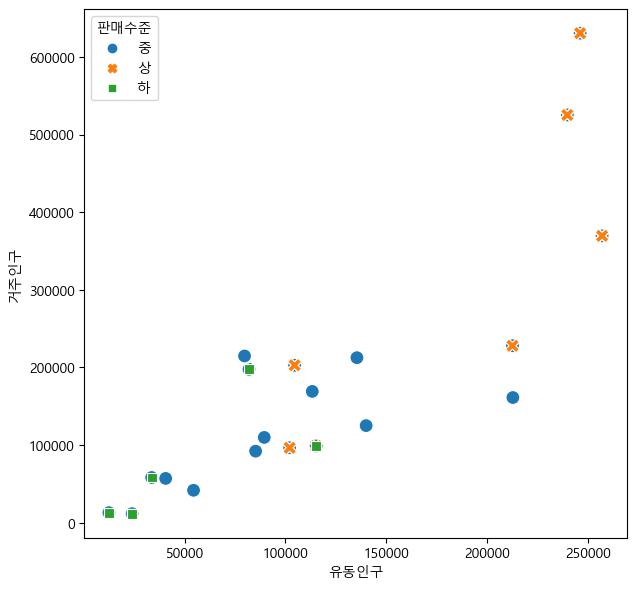

In [101]:
plt.figure(figsize=(7, 7))
sns.scatterplot(x= '유동인구', y= '거주인구', hue='판매수준', style='판매수준', s=100, data=dataset_90)
plt.show()

In [9]:
font_path = "c:/Windows/fonts/malgun.ttf"

In [10]:
font_name = fm.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)


In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn import tree

In [103]:
dataset_90['성별']=dataset_90['성별'].replace(['남성','여성'],[0,1])

In [104]:
dataset_90['읍면동명']=dataset_90['읍면동명'].astype('category') 

In [105]:
dataset_90['업종명']=dataset_90['업종명'].astype('category') 

In [110]:
dataset_90

,년월,시도명,지역구분,읍면동명,거주인구,유동인구,근로인구,업종코드,업종명,이용자 구분,관광구분,연령대,성별,이용자수,이용건수,이용금액,매장수,업종명 대분류,데이터기준일자,판매수준
0,17-Jan,서귀포시,읍면,34,98878,115207,7382,G47121,20,제주도민,2,30.0,0,129,141,1527890,214,소매업,2020-12-15,중
2,17-Jan,서귀포시,도심,27,212570,135444,212570,I56211,26,내국인,0,70.0,0,3,3,630000,275,음식점업,2020-12-15,중
3,17-Jan,서귀포시,도심,27,212570,135444,212570,I56211,26,제주도민,2,70.0,0,51,54,10790000,275,음식점업,2020-12-15,상
4,17-Jan,서귀포시,도심,27,212570,135444,212570,I56211,26,제주도민,2,70.0,1,4,4,684000,275,음식점업,2020-12-15,중
5,17-Jan,서귀포시,도심,27,212570,135444,212570,I56211,26,제주도민,2,60.0,0,214,231,39547110,275,음식점업,2020-12-15,상
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478615,17-Dec,제주시,도심,48,212570,135444,212570,I55112,22,제주도민,2,30.0,0,9,9,675000,1814,숙박업,2020-12-15,중
478616,17-Dec,제주시,도심,51,212570,135444,212570,I55112,22,제주도민,2,50.0,0,61,64,3508956,1814,숙박업,2020-12-15,상
478617,17-Dec,제주시,도심,51,212570,135444,212570,I55112,22,제주도민,2,40.0,0,63,69,5960920,1814,숙박업,2020-12-15,상
478619,17-Dec,제주시,도심,51,212570,135444,212570,I55112,22,내국인,0,60.0,0,22,22,1187850,1814,숙박업,2020-12-15,중


In [102]:
dataset_90=dataset_90.dropna()

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
encoder = LabelEncoder()

In [106]:
dataset_90['관광구분'] = encoder.fit_transform(dataset_90['관광구분'])

In [108]:
dataset_90['읍면동명'] = encoder.fit_transform(dataset_90['읍면동명'])

In [109]:
dataset_90['업종명'] = encoder.fit_transform(dataset_90['업종명'])

In [59]:
X_90 = dataset[['읍면동명', '업종명', '관광구분', '연령대','성별'  ]]
y_90 = dataset['판매수준']

In [94]:
dt_clf_90 = DecisionTreeClassifier(max_depth=3)

In [95]:
dt_clf_model_90 = dt_clf_90.fit(X, y)

In [84]:
print(dt_clf_model_90)

DecisionTreeClassifier(max_depth=6)


In [26]:
from sklearn.tree import export_graphviz

In [85]:
dt_clf_model_90.feature_importances_

array([1.54576352e-02, 4.24532877e-01, 1.21704091e-01, 4.38163945e-01,
       1.41450671e-04])

In [64]:
dt_clf_model_text = tree.export_text(dt_clf_model_90)

In [29]:
print(dt_clf_model_text)

|--- feature_3 <= 15.00
|   |--- feature_2 <= 1.50
|   |   |--- feature_1 <= 15.50
|   |   |   |--- feature_1 <= 14.00
|   |   |   |   |--- feature_1 <= 9.00
|   |   |   |   |   |--- feature_0 <= 40.50
|   |   |   |   |   |   |--- feature_1 <= 3.50
|   |   |   |   |   |   |   |--- feature_0 <= 7.50
|   |   |   |   |   |   |   |   |--- feature_1 <= 1.50
|   |   |   |   |   |   |   |   |   |--- feature_2 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- class: 중
|   |   |   |   |   |   |   |   |   |--- feature_2 >  0.50
|   |   |   |   |   |   |   |   |   |   |--- class: 하
|   |   |   |   |   |   |   |   |--- feature_1 >  1.50
|   |   |   |   |   |   |   |   |   |--- feature_4 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- class: 하
|   |   |   |   |   |   |   |   |   |--- feature_4 >  0.50
|   |   |   |   |   |   |   |   |   |   |--- feature_2 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 하
|   |   |   |   |   |   |   |   |   |   |--- feature_2 >  0.50
|   |   

In [34]:
fig = plt.figure(figsize=(15,8))

<Figure size 1080x576 with 0 Axes>

In [38]:
!pip install graphviz

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from sklearn.datasets import make_classification
import graphviz
import warnings
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')

In [74]:
dot_data_90 = export_graphviz(dt_clf_model_90, out_file=None, feature_names=['읍면동명', '업종명', '관광구분', '연령대','성별'],
                          class_names=['상','중','하'], filled=True, rounded=True, special_characters=True)

In [51]:
from sklearn.tree import export_graphviz

In [53]:
!pip install pydotplus

  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24572 sha256=8f8f622dc81a0a4348483637ceb4b958df7f34cc9198619292ba3b886a0b16e0
  Stored in directory: c:\users\whals\appdata\local\pip\cache\wheels\fe\cd\78\a7e873cc049759194f8271f780640cf96b35e5a48bef0e2f36
Successfully built pydotplus


In [55]:
import pydotplus

In [77]:
graph_90 = pydotplus.graph_from_dot_data(dot_data_90)

KeyboardInterrupt: 

In [67]:
from IPython.display import Image

In [ ]:
Image(graph.create_png())

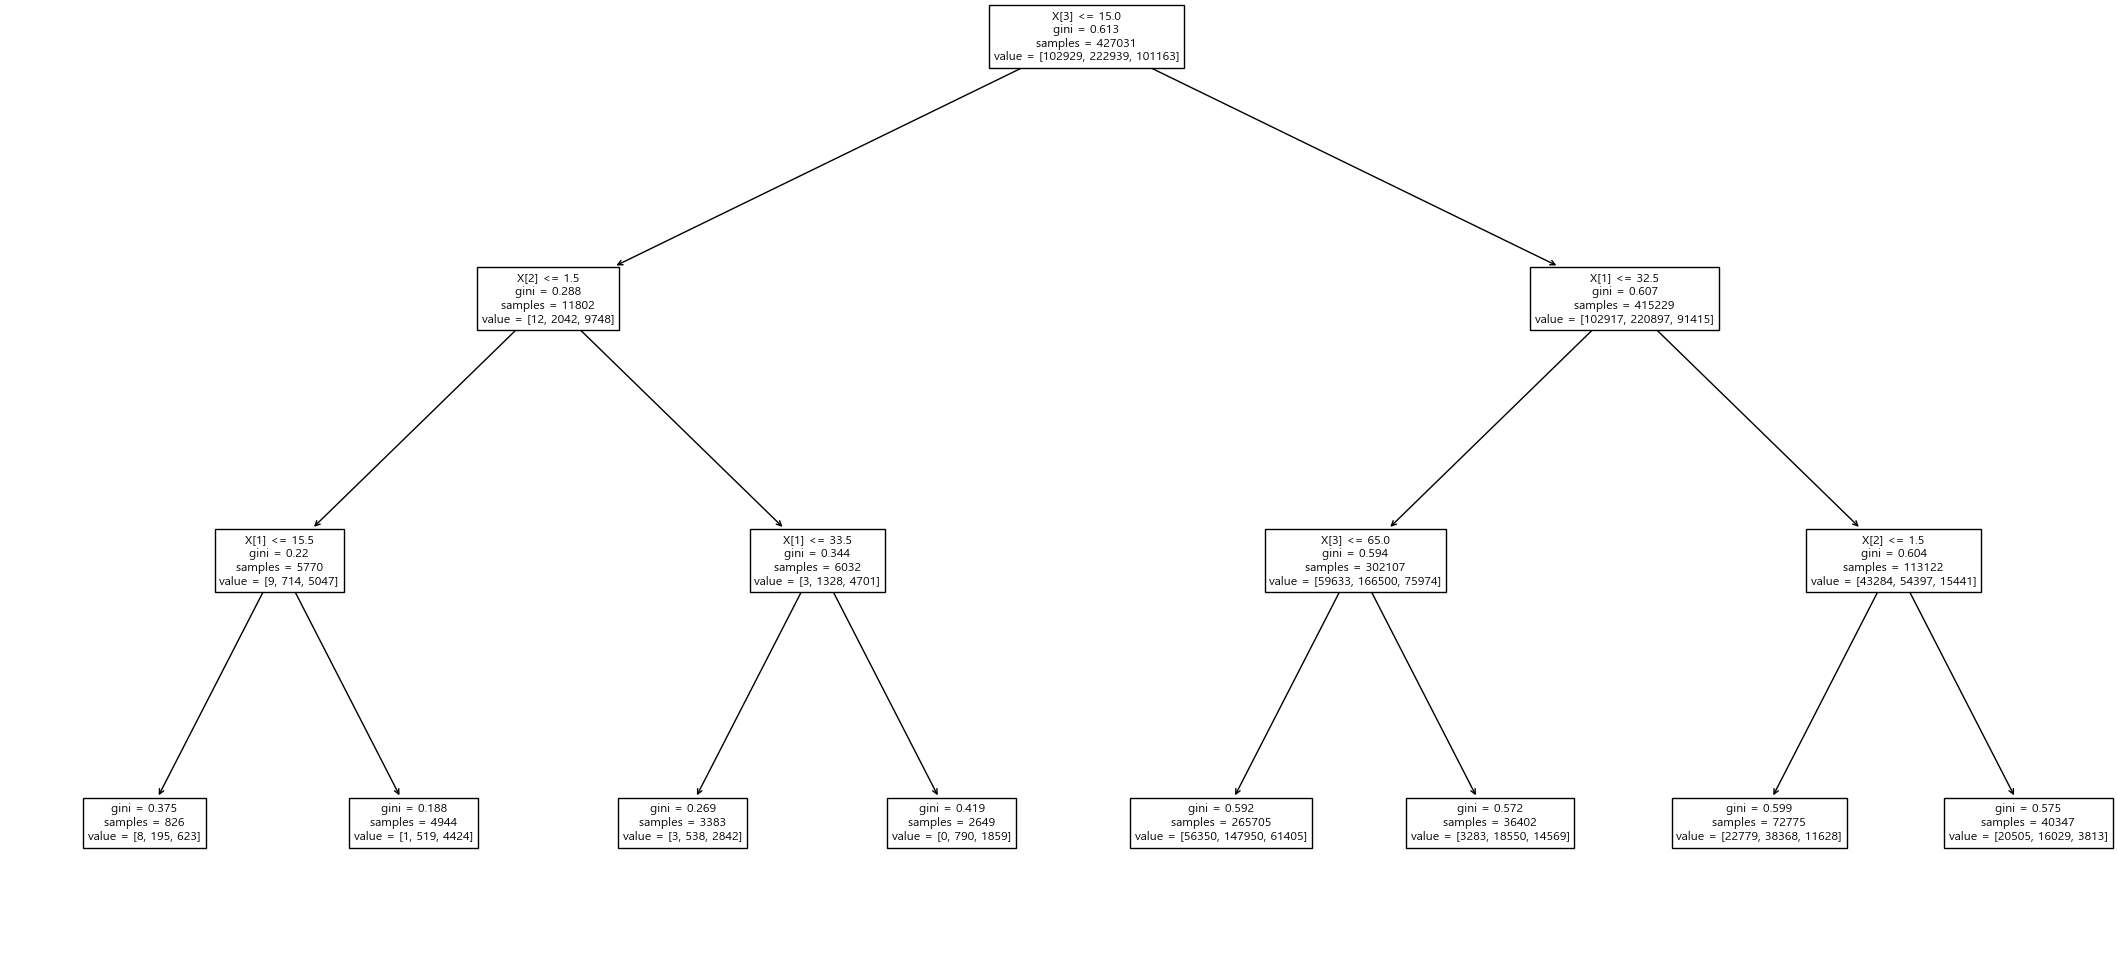

In [96]:
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':[20,10],
                    'figure.dpi':'100'})

graph_90 = tree.plot_tree(dt_clf_model_90)

In [111]:
dt_graph = graphviz.Source(tree_dot, format='png')

NameError: name 'tree_dot' is not defined